## EDA With Google Playstore

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./dataset/playstore_cleaned_dataset.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [3]:
df.shape

(10840, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Day             10840 non-null  int64  
 14  Month           10840 non-null  int64  
 15  Year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [6]:
df['App'].duplicated().sum()

1181

### Observation
- The dataset has duplicate records

In [7]:
# Remove duplicate records
df = df.drop_duplicates(subset=["App"], keep="first")

In [8]:
df.shape

(9659, 16)

In [9]:
df.duplicated().sum()

0

## **Explore Data**

In [10]:
df["App"].dtype

dtype('O')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  Day             9659 non-null   int64  
 14  Month           9659 non-null   int64  
 15  Year            9659 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [12]:
numerical_features = [column for column in df.columns if df[column].dtype !='O']
categorical_features = [column for column in df.columns if df[column].dtype =='O']

In [13]:
numerical_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [14]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [15]:
len(numerical_features)

8

In [16]:
len(categorical_features)

8

In [17]:
# Proportion of count data on categorical columns

for cat_feture in categorical_features:
    print(df[cat_feture].value_counts(normalize=True)*100)
    print("--------------------- *** -------------------")

Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
--------------------- *** -------------------
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
F

In [18]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10835    4.5
10836    5.0
10837    NaN
10838    4.5
10839    4.5
Name: Rating, Length: 9659, dtype: float64

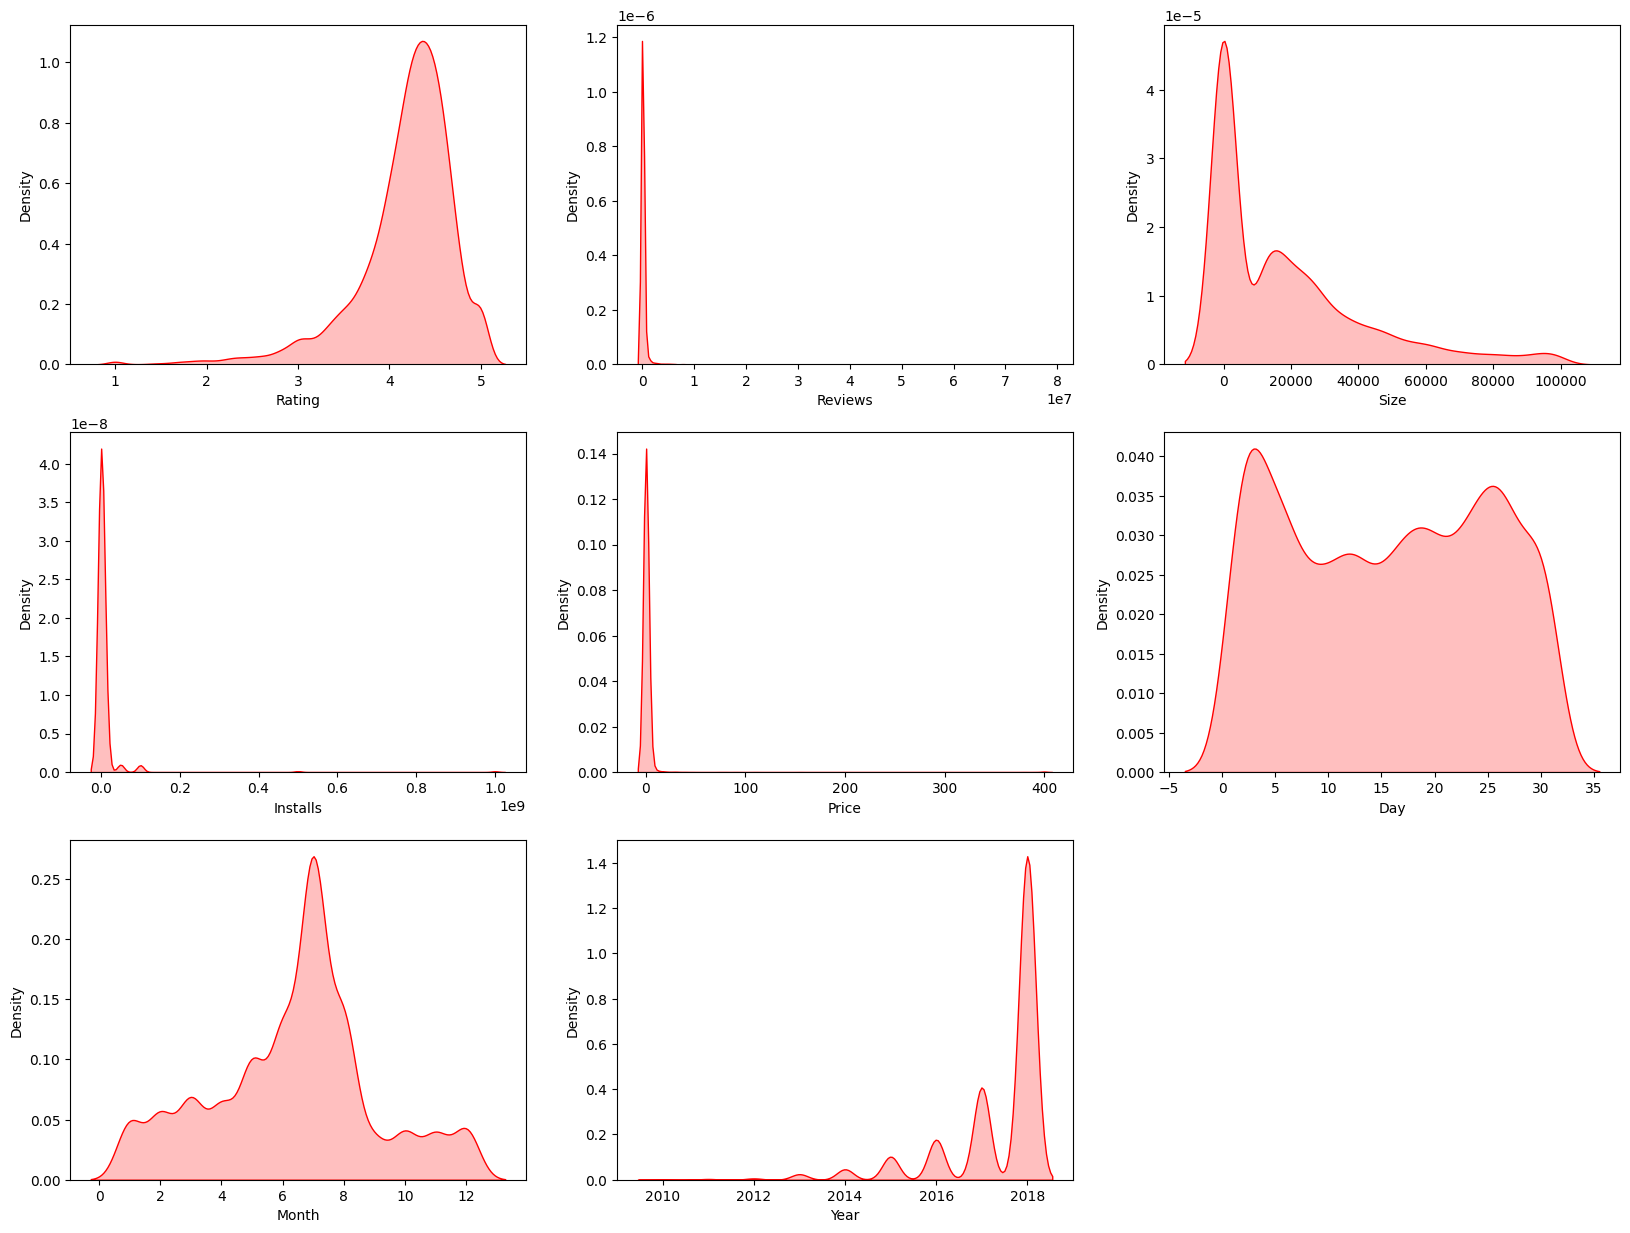

In [19]:
# For numerical_features Kernel Density

plt.figure(figsize=(20,15))
for x in range(len(numerical_features)):
    plt.subplot(3,3,x+1) 
    sns.kdeplot(df[numerical_features[x]], fill=True, color="r")

## Observations
- Rating and Year Feature is Left Skewed
- Reviews, Size Installs, Price Features are Right Skewed

In [20]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

<Axes: xlabel='Category', ylabel='count'>

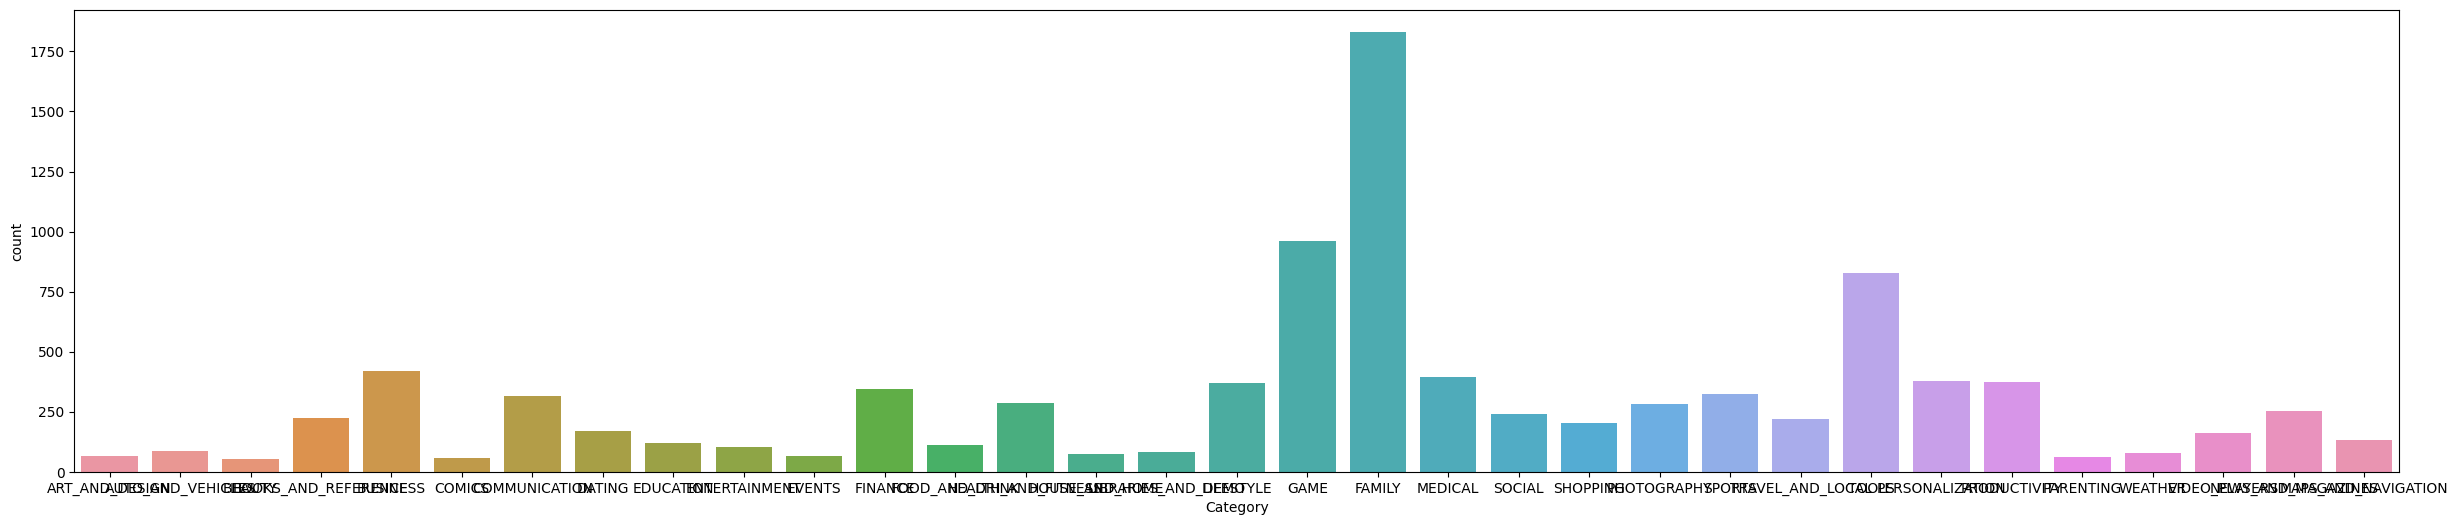

In [21]:
plt.figure(figsize=(30,6))
sns.countplot(x=df["Category"])

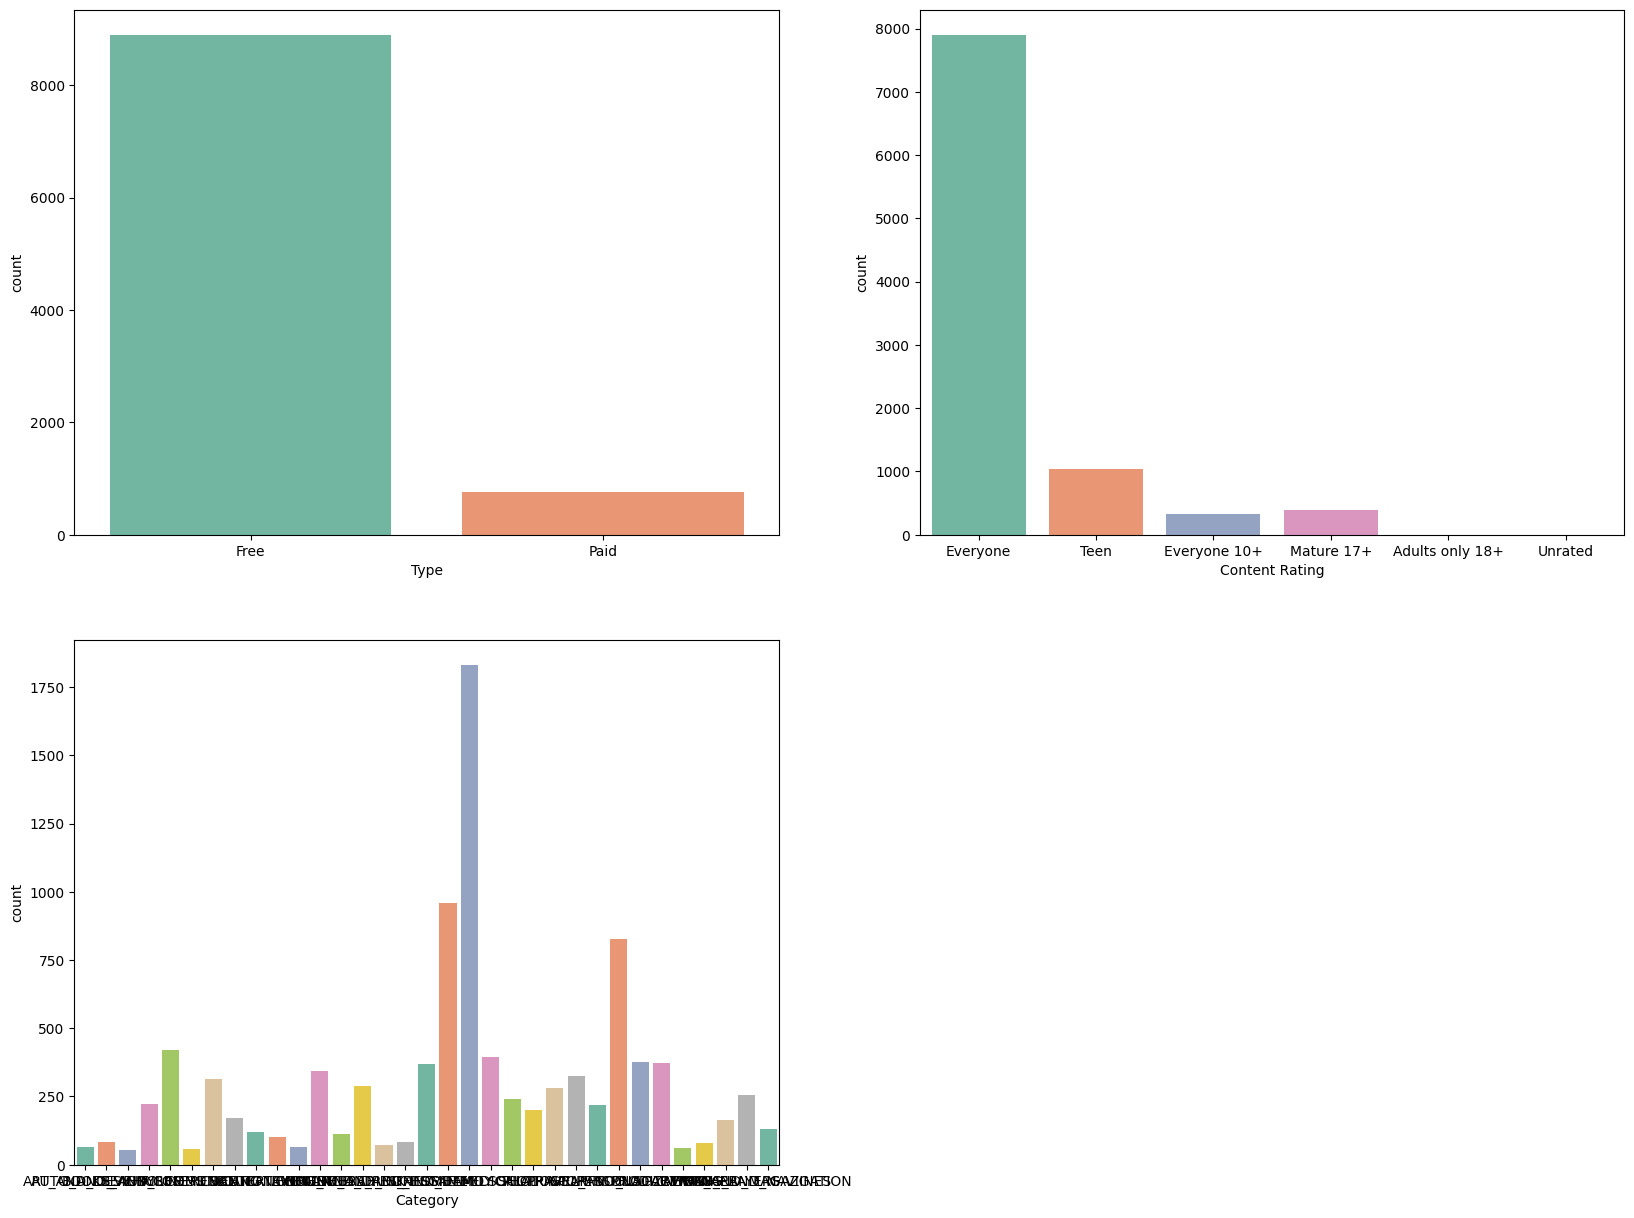

In [22]:
# Countplot for Categorical Features
plt.figure(figsize=(20, 15))
# plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating', 'Category']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    # plt.xlabel(category[i])
    # plt.xticks(rotation=45)
    # plt.tight_layout() 

## Observations
- Rating and Year Feature is Left Skewed
- Reviews, Size Installs, Price Features are Right Skewed

## **Which is the most popular app category?**

In [23]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<Axes: ylabel='Category'>

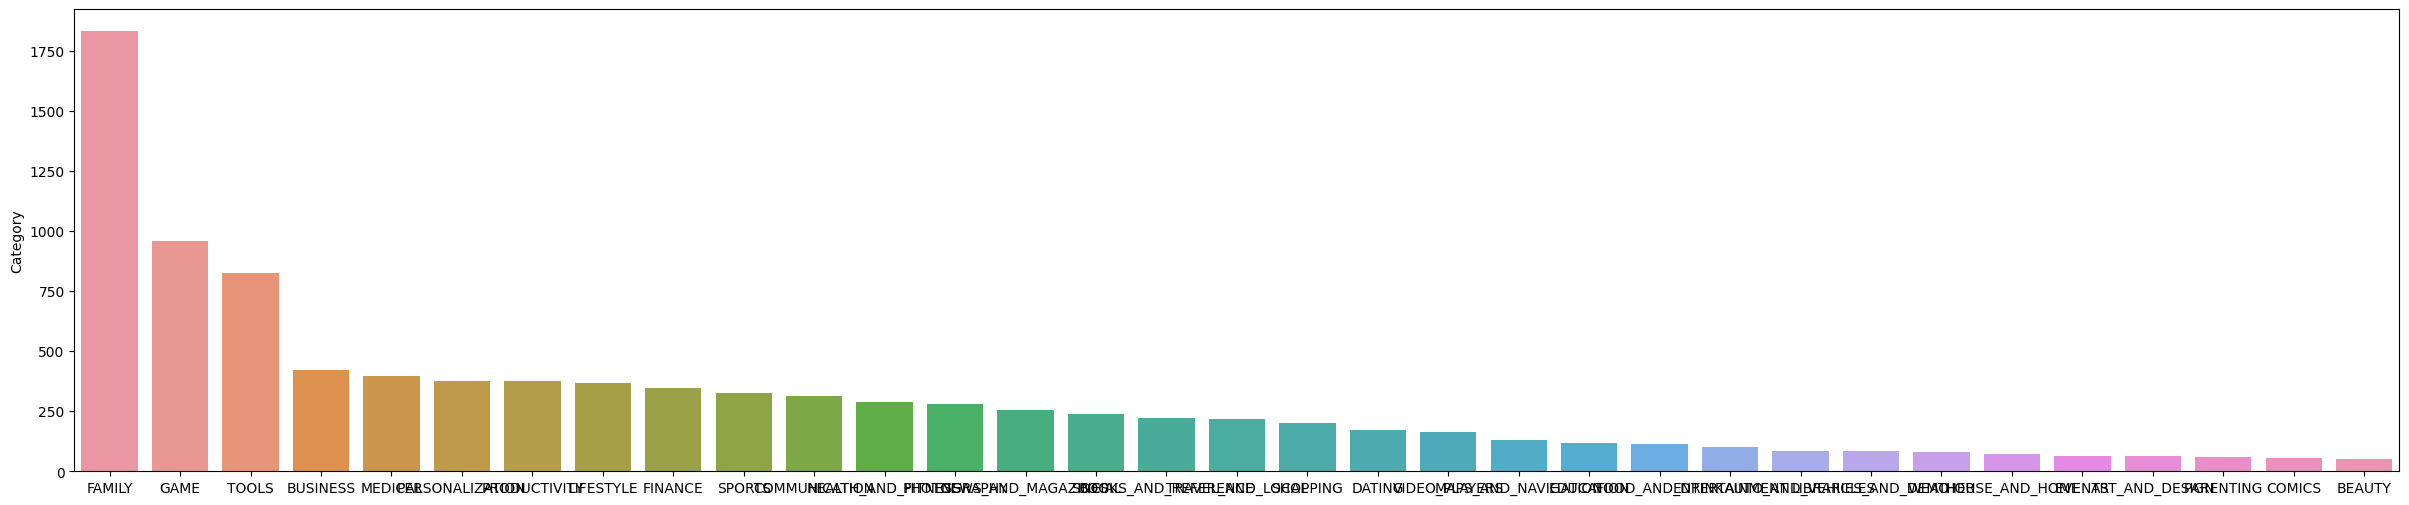

In [24]:
plt.figure(figsize=(30,6))
sns.barplot(x=df["Category"].value_counts().index, y=df["Category"].value_counts())

In [25]:
df['Category'].value_counts().index

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS', 'COMMUNICATION',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
       'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'WEATHER',
       'HOUSE_AND_HOME', 'EVENTS', 'ART_AND_DESIGN', 'PARENTING', 'COMICS',
       'BEAUTY'],
      dtype='object')

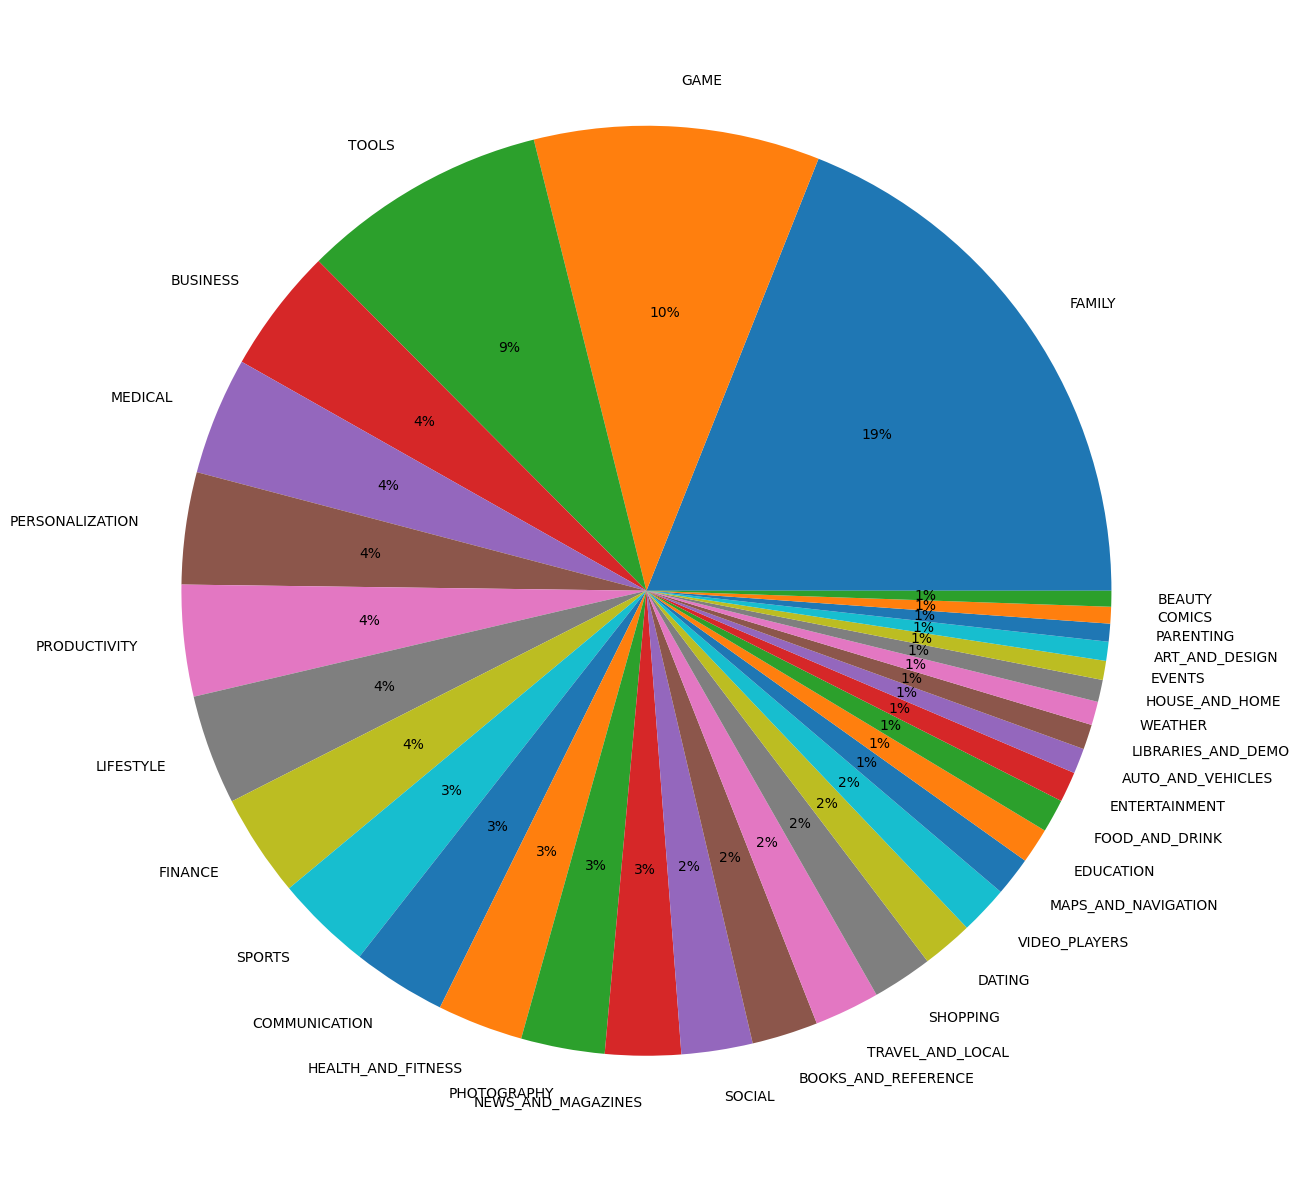

In [26]:
plt.figure(figsize=(15,16))
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%.0f%%')
plt.show()

## Observations
- FAMILY, GAME, TOOLS categories are most popular app category

## **Which are the top 10 App Categories?**

In [27]:
# Top 10 App Categories

df["Category"].value_counts()[0:9]

FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
Name: Category, dtype: int64

In [28]:
categories = pd.DataFrame(df["Category"].value_counts())
categories

,Category
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


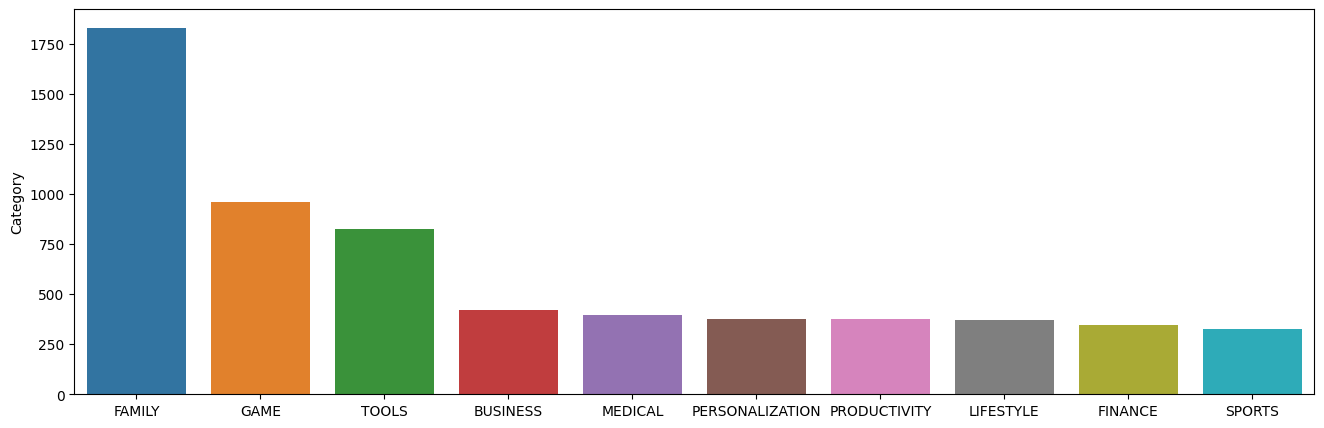

In [29]:
plt.figure(figsize=(16,5))
sns.barplot(x=categories.index[:10], y="Category", data = categories[:10])
plt.show()

## Observations
- Family category has hight number of apps

## **Which Category has largest number of installation?**

In [30]:
df[df["Category"]=="ART_AND_DESIGN"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,Easy DIY CD Craft Ideas,ART_AND_DESIGN,NaN,7,5.6,5000,Free,0.0,Everyone,Art & Design,2018-05-30,1.0,2.3 and up,30,5,2018
8679,Dp for girls,ART_AND_DESIGN,4.2,175,8.2,50000,Free,0.0,Everyone,Art & Design,2017-05-26,1.2,4.0.3 and up,26,5,2017
8712,Name Art DP - Focus n Filter Text 2018,ART_AND_DESIGN,4.3,132,7.7,10000,Free,0.0,Everyone,Art & Design,2018-01-04,1,4.1 and up,4,1,2018
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2,0,Free,0.0,Everyone,Art & Design,2017-03-14,4.0,4.2 and up,14,3,2017


In [31]:
groupItem = df.groupby("Category")["Installs"].sum().sort_values(ascending=False).reset_index()
groupItem

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


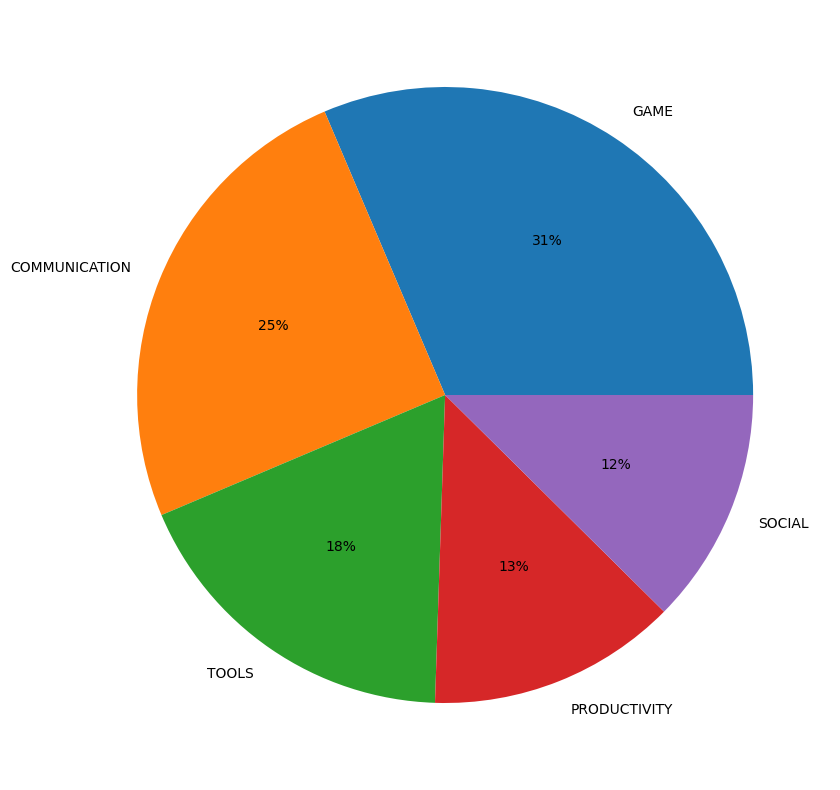

In [32]:
plt.figure(figsize=(10,10))
plt.pie(groupItem["Installs"][:5], labels=groupItem["Category"][:5], autopct='%.0f%%')
plt.show()

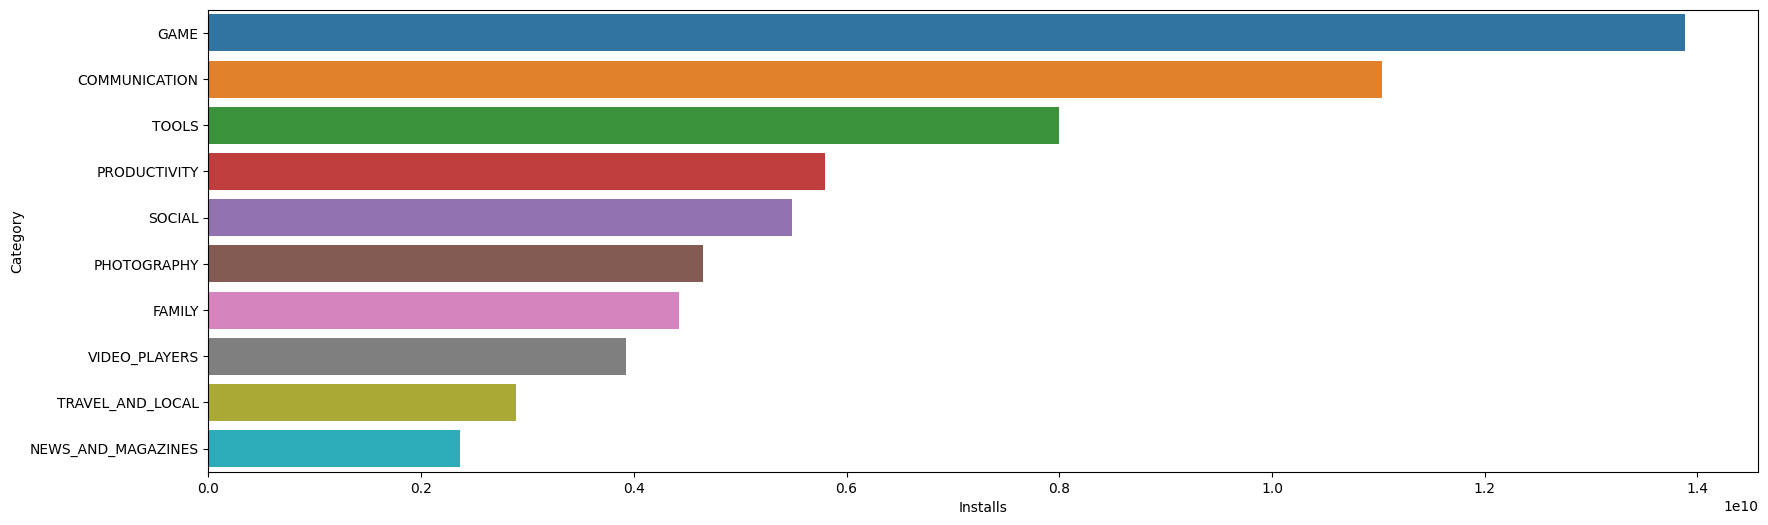

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(x="Installs", y="Category", data=groupItem[:10])
plt.show()

## **What are the Top 5 most installed Apps in Each popular Categories ??**

In [34]:
apps = df.groupby(["Category", "App"])["Installs"].sum().reset_index()
apps = apps.sort_values("Installs", ascending=False)
apps

,Category,App,Installs
9311,TRAVEL_AND_LOCAL,Google Street View,1000000000
6388,NEWS_AND_MAGAZINES,Google News,1000000000
1145,COMMUNICATION,Skype - free IM & video calls,1000000000
9566,VIDEO_PLAYERS,YouTube,1000000000
1181,COMMUNICATION,WhatsApp Messenger,1000000000
...,...,...,...
9275,TRAVEL_AND_LOCAL,EG | Explore Folegandros,0
6020,MEDICAL,EP Cook Book,0
3662,FINANCE,Eu sou Rico,0
1797,FAMILY,Ain Arabic Kids Alif Ba ta,0


In [35]:
popular_categories = df["Category"].value_counts()[:5]
popular_categories

FAMILY      1832
GAME         959
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: Category, dtype: int64

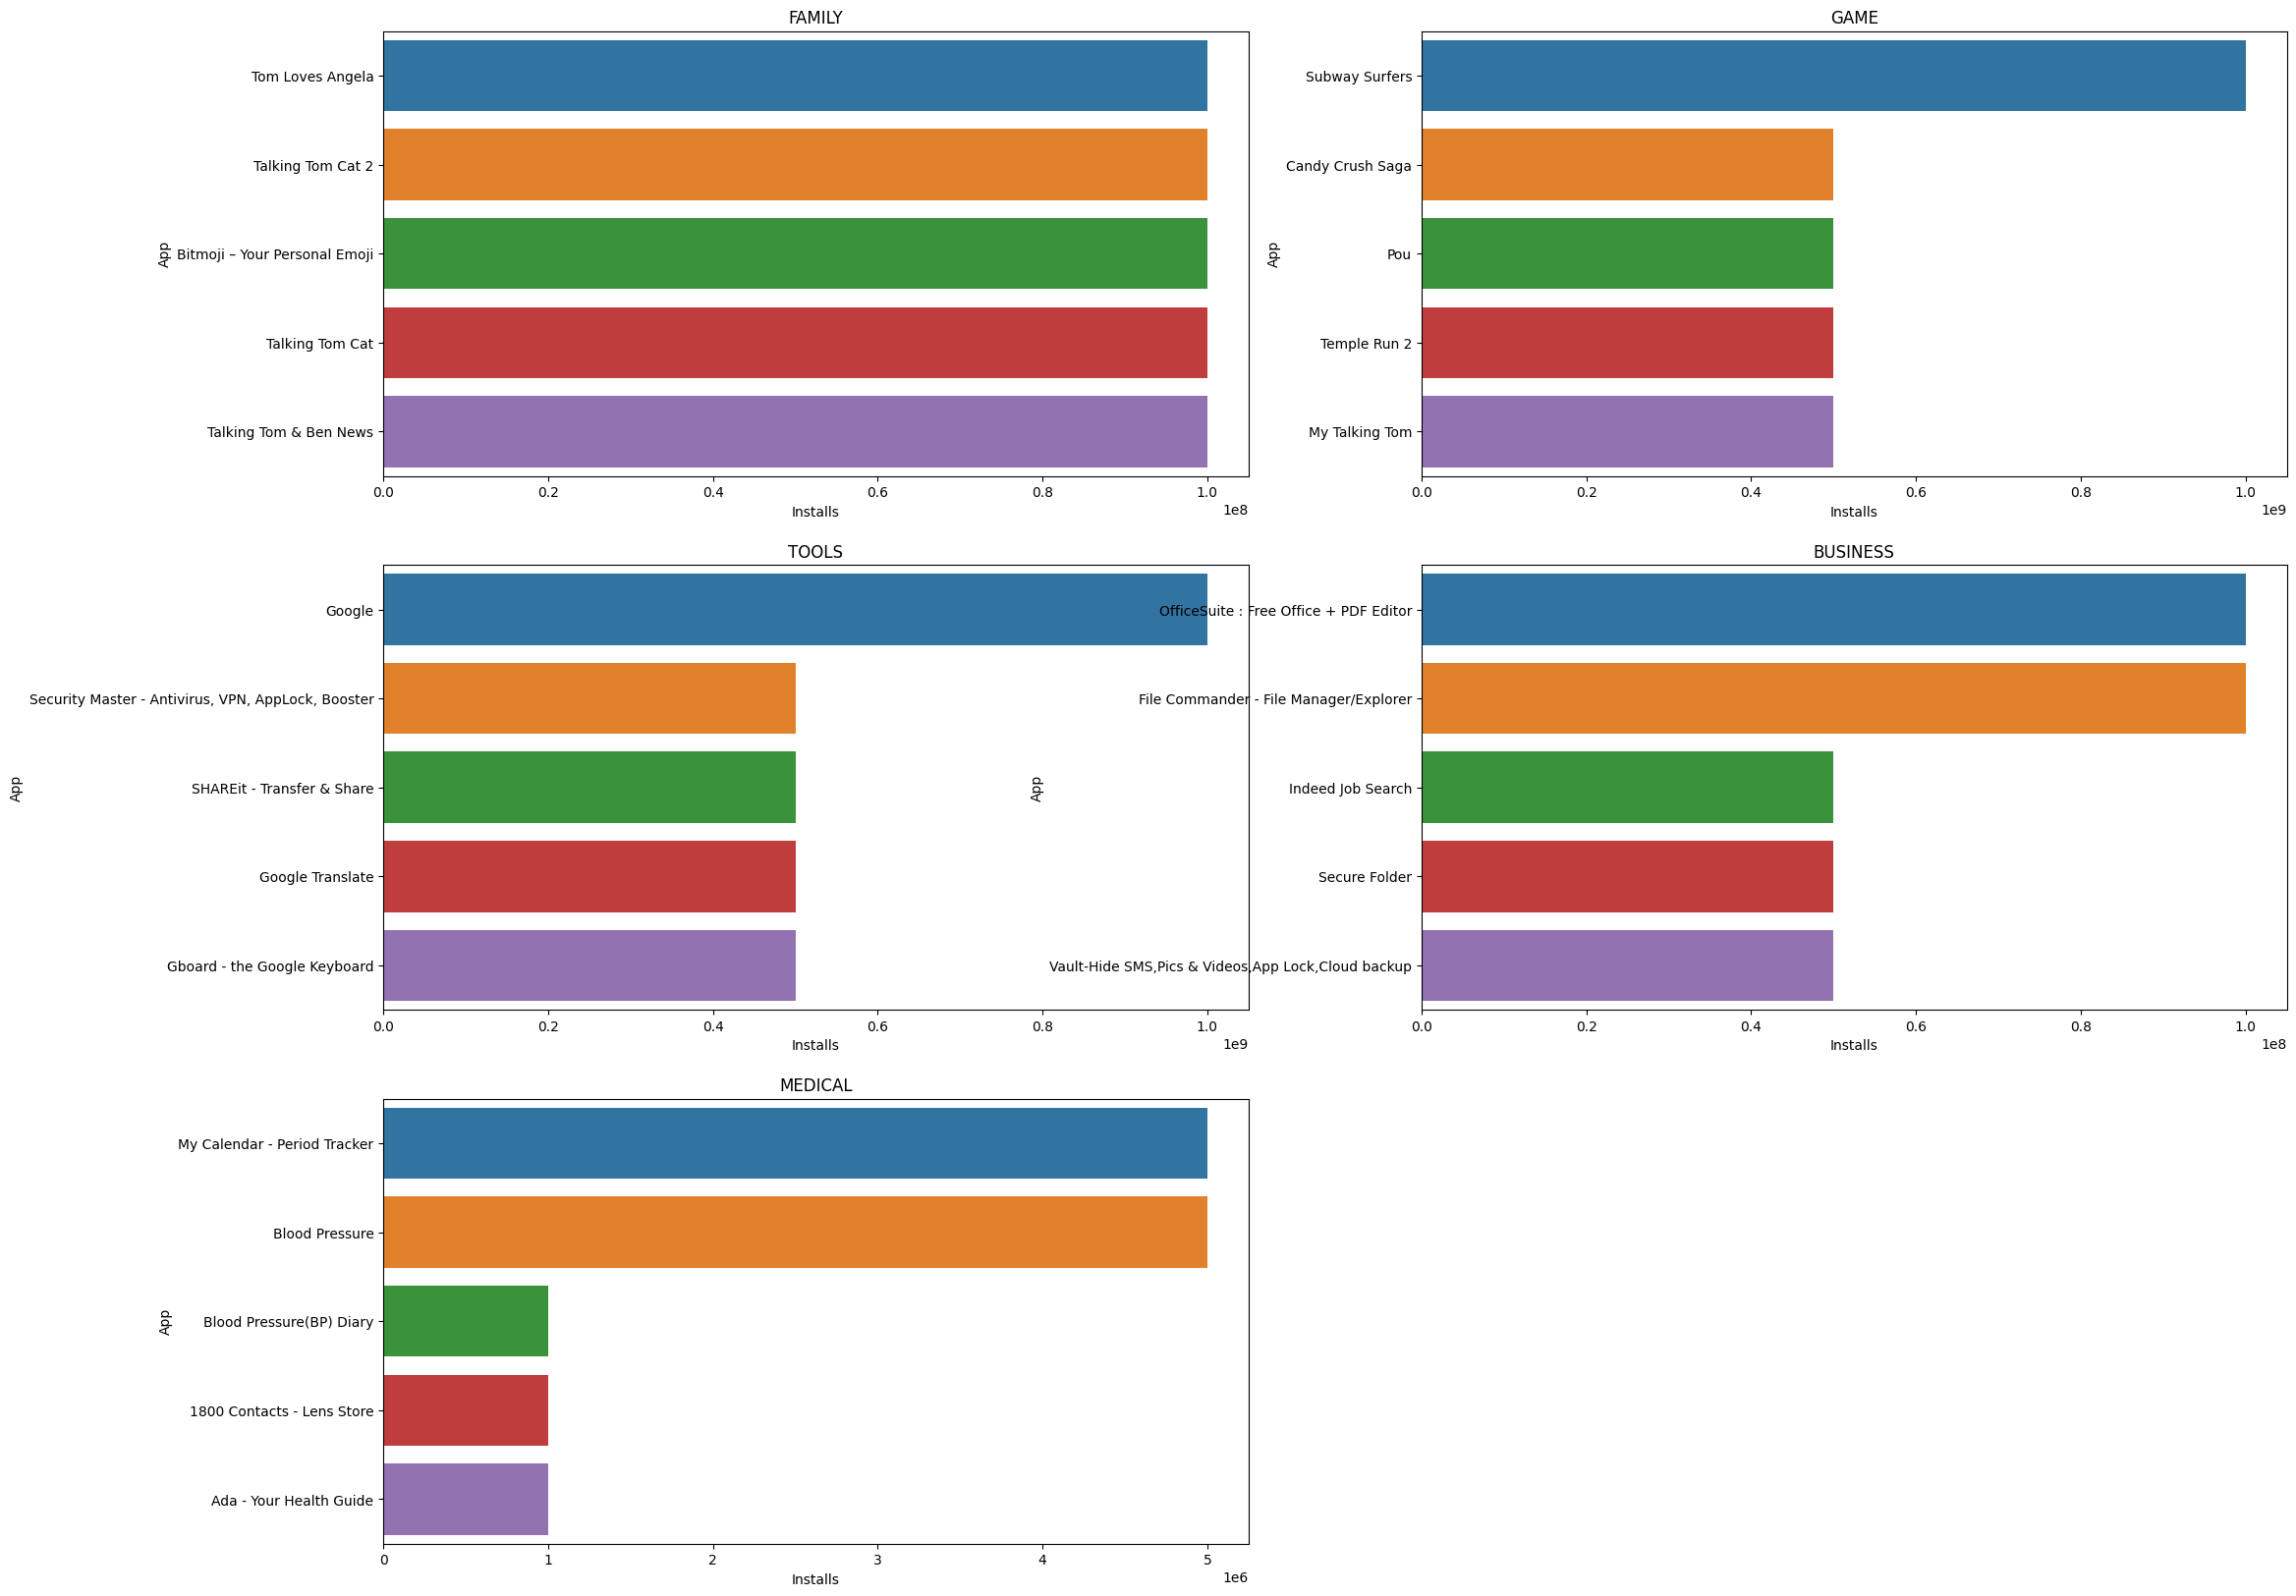

In [36]:
i=0
plt.figure(figsize=(25,20))
for popular_category in popular_categories.index:
    i=i+1
    popular_apps = apps[apps.Category == popular_category]
    popular_apps = popular_apps.head(5)
    
    plt.subplot(3,2,i)
    sns.barplot(x="Installs", y="App", data=popular_apps)
    plt.title(popular_category)

## **How many apps are there on Google Play Store which get 5 ratings??**

In [37]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [59]:
top_rating_apps = df.groupby(["Category", "App", "Installs"])["Rating"].sum().reset_index()
top_rating_apps = top_rating_apps.sort_values("Installs", ascending=False)
top_rating_apps = top_rating_apps[top_rating_apps.Rating == 5.0]
top_rating_apps

,Category,App,Installs,Rating
2477,FAMILY,Ek Bander Ne Kholi Dukan,10000,5.0
8567,TOOLS,CL Keyboard - Myanmar Keyboard (No Ads),5000,5.0
5630,LIFESTYLE,Oración CX,5000,5.0
887,COMICS,"Superheroes, Marvel, DC, Comics, TV, Movies News",5000,5.0
720,BUSINESS,Jobs in Canada - Emplois au Canada,1000,5.0
...,...,...,...,...
7839,SOCIAL,CB Heroes,5,5.0
6207,MEDICAL,Tablet Reminder,5,5.0
4573,GAME,Mu.F.O.,1,5.0
6083,MEDICAL,KBA-EZ Health Guide,1,5.0


In [60]:
top_rating_apps.head(1)

,Category,App,Installs,Rating
2477,FAMILY,Ek Bander Ne Kholi Dukan,10000,5.0
